# 2. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import spacy_transformers
import re
from gensim.models.doc2vec import TaggedDocument
from nltk.tokenize import RegexpTokenizer
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib._color_data as mcd
nlp = spacy.load("en_core_web_trf")
#!python3 -m spacy download en_core_web_trf
pd.set_option('display.max_columns',150)

In [2]:
movie_df = pd.read_csv('/Users/meg/Thesis/wiki_movie_plots.csv')

### 1. Remove Character Names.
Notebook #1 details how name tokenization and removal was performed. This took over 12 hrs.

View Example:

In [3]:
character_rem = pd.read_csv('/Users/meg/Thesis/Plots_Without_Names.csv')

character_rem=character_rem['Plot2']
movie_df=pd.concat([movie_df, character_rem], axis=1)

In [4]:
doc = nlp(movie_df["Plot"][3274][0:455])
displacy.render(doc, style='ent')

In [5]:
movie_df=movie_df.drop(columns=['Plot'])
movie_df=movie_df.rename(columns = {'Plot2':'Plot'})

### 2. Remove Citations within Plots

In [6]:
def remove_citation(text):
    return re.sub(r'\[\d+\]', '', text)
movie_df['Plot'] = movie_df['Plot'].apply(remove_citation)

### 3. Remove Empty Parentheses ()
This mainly occurs when character names were removed from between parenthesis

In [7]:
movie_df['Plot']=movie_df['Plot'].str.replace("()", '', regex=False)

### 4. Eliminate Duplicate Whitespace

In [8]:
#remove whitespace
def remove_dupwhite(text):
    return re.sub(r'\s+', ' ', text)
movie_df['Plot'] = movie_df['Plot'].apply(remove_dupwhite)

### 5. Clean Genre
code resource: https://www.kaggle.com/code/basu369victor/recommender-system-using-un-supervised-learning/notebook

In [9]:
def Data_Cleaning(Genre):
    '''
    Here we have cleaned the entire Genre column of the dataset by removing unwanted symbols, categories, and 
    replacing categories which meant the same with a common category name. It reduduces our number of target labels.
    NOTE: This function is inspired from the kernel - https://www.kaggle.com/aminejallouli/genre-classification-based-on-wiki-movies-plots
    I have only improved it a bit further according to my requirements.
    '''
    movie_df['Genre_improved'] = movie_df['Genre']
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.strip()
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' - ', '|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' / ', '|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('/', '|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' & ', '|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(', ', '|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('; ', '|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('bio-pic', 'biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biopic', 'biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biographical', 'biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biodrama', 'biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('bio-drama', 'biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biographic', 'biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(film genre\)', '')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('animated','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('anime','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('children\'s','children')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedey','comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\[not in citation given\]','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' set 4,000 years ago in the canadian arctic','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('historical','history')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romantic','romance')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('3-d','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('3d','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('viacom 18 motion pictures','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('sci-fi','science_fiction')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('ttriller','thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('.','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('based on radio serial','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' on the early years of hitler','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('sci fi','science_fiction')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('science fiction','science_fiction')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' (30min)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('16 mm film','short')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\[140\]','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\[144\]','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' for ','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('adventures','adventure')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('kung fu','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('kung-fu','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('martial arts','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('world war ii','war')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('world war i','war')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biography about montreal canadiens star|maurice richard','biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('bholenath movies|cinekorn entertainment','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(volleyball\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('spy film','spy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('anthology film','anthology')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biography fim','biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('avant-garde','avant_garde')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biker film','biker')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('buddy cop','buddy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('buddy film','buddy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedy 2-reeler','comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('films','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('film','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biography of pioneering american photographer eadweard muybridge','biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('british-german co-production','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('bruceploitation','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedy-drama adaptation of the mordecai richler novel','comedy-drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('movies by the mob\|knkspl','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('movies','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('movie','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('coming of age','coming_of_age')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('coming-of-age','coming_of_age')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('drama about child soldiers','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('(( based).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('(( co-produced).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('(( adapted).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('(( about).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('musical b','musical')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('animationchildren','animation|children')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' period','period')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('drama loosely','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(aquatics|swimming\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(aquatics|swimming\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace("yogesh dattatraya gosavi's directorial debut \[9\]",'')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace("war-time","war")
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace("wartime","war")
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace("ww1","war")
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('unknown','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace("wwii","war")
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('psychological','psycho')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('rom-coms','romance')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('true crime','crime')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|007','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('slice of life','slice_of_life')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('computer animation','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('gun fu','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('j-horror','horror')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(shogi|chess\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('afghan war drama','war drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|6 separate stories','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(30min\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' (road bicycle racing)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' v-cinema','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('tv miniseries','tv_miniseries')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|docudrama','\|documentary|drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' in animation','|animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('((adaptation).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('((adaptated).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('((adapted).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('(( on ).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('american football','sports')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dev\|nusrat jahan','sports')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('television miniseries','tv_miniseries')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(artistic\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \|direct-to-dvd','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('history dram','history drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('martial art','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('psycho thriller,','psycho thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|1 girl\|3 suitors','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(road bicycle racing\)','')
    filterE = movie_df['Genre_improved']=="ero"
    movie_df.loc[filterE,'Genre_improved']="adult"
    filterE = movie_df['Genre_improved']=="music"
    movie_df.loc[filterE,'Genre_improved']="musical"
    filterE = movie_df['Genre_improved']=="-"
    movie_df.loc[filterE,'Genre_improved']=''
    filterE = movie_df['Genre_improved']=="comedy–drama"
    movie_df.loc[filterE,'Genre_improved'] = "comedy|drama"
    filterE = movie_df['Genre_improved']=="comedy–horror"
    movie_df.loc[filterE,'Genre_improved'] = "comedy|horror"
    
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' ','|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(',','|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('-','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actionadventure','action|adventure')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actioncomedy','action|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actiondrama','action|drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actionlove','action|love')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actionmasala','action|masala')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actionchildren','action|children')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('fantasychildren\|','fantasy|children')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('fantasycomedy','fantasy|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('fantasyperiod','fantasy|period')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('cbctv_miniseries','tv_miniseries')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramacomedy','drama|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramacomedysocial','drama|comedy|social')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramathriller','drama|thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedydrama','comedy|drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramathriller','drama|thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedyhorror','comedy|horror')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('sciencefiction','science_fiction')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('adventurecomedy','adventure|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('animationdrama','animation|drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|\|','|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('muslim','religious')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('thriler','thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('crimethriller','crime|thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('fantay','fantasy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actionthriller','action|thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedysocial','comedy|social')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('martialarts','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|\(children\|poker\|karuta\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('epichistory','epic|history')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('erotica','adult')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('erotic','adult')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('((\|produced\|).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('chanbara','chambara')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedythriller','comedy|thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biblical','religious')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biblical','religious')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('colour\|yellow\|productions\|eros\|international','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|directtodvd','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('liveaction','live|action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('melodrama','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('superheroes','superheroe')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('gangsterthriller','gangster|thriller')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('heistcomedy','comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('heist','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('historic','history')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('historydisaster','history|disaster')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('warcomedy','war|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('westerncomedy','western|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('ancientcostume','costume')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('computeranimation','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramatic','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('familya','family')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('familya','family')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramedy','drama|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramaa','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('famil\|','family')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('superheroe','superhero')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biogtaphy','biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('devotionalbiography','devotional|biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('docufiction','documentary|fiction')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('familydrama','family|drama')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('espionage','spy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('supeheroes','superhero')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romancefiction','romance|fiction')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('horrorthriller','horror|thriller')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('suspensethriller','suspense|thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('musicaliography','musical|biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('triller','thriller')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|\(fiction\)','|fiction')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romanceaction','romance|action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romancecomedy','romance|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romancehorror','romance|horror')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romcom','romance|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('rom\|com','romance|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('satirical','satire')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('science_fictionchildren','science_fiction|children')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('homosexual','adult')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('sexual','adult')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('mockumentary','documentary')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('periodic','period')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romanctic','romance')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('politics','political')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('samurai','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('tv_miniseries','series')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('serial','series')

    filterE = movie_df['Genre_improved']=="musical–comedy"
    movie_df.loc[filterE,'Genre_improved'] = "musical|comedy"

    filterE = movie_df['Genre_improved']=="roman|porno"
    movie_df.loc[filterE,'Genre_improved'] = "adult"


    filterE = movie_df['Genre_improved']=="action—masala"
    movie_df.loc[filterE,'Genre_improved'] = "action|masala"


    filterE = movie_df['Genre_improved']=="horror–thriller"
    movie_df.loc[filterE,'Genre_improved'] = "horror|thriller"

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('family','children')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('martial_arts','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('horror','thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('war','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('adventure','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('science_fiction','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('western','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('western','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('noir','black')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('spy','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('superhero','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('social','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('suspense','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('sex','adult')


    filterE = movie_df['Genre_improved']=="drama|romance|adult|children"
    movie_df.loc[filterE,'Genre_improved'] = "drama|romance|adult"

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|–\|','|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.strip(to_strip='\|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actionner','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('love','romance')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('crime','mystery')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('kids','children')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('boxing','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('buddy','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('cartoon','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('cinema','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('religious','supernatural')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('christian','supernatural')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('lgbtthemed','romance')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('detective','mystery')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('nature','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('fiction','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('music','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('musical','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('short','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('mythology','supernatural')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('mythological','supernatural')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('masala','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('military','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('sexploitation','adult')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('tragedy','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('murder','mystery')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('disaster','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('documentary','biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dance','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('cowboy','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('anthology','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('artistical','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('art','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.strip()
    return movie_df['Genre_improved']

In [10]:
%%time 
Data_Cleaning(movie_df)

/var/folders/26/fmmjwwb14xv0qs1bkkgbnj5h0000gp/T/ipykernel_24407/4034455552.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(film genre\)', '')
/var/folders/26/fmmjwwb14xv0qs1bkkgbnj5h0000gp/T/ipykernel_24407/4034455552.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\[not in citation given\]','')
/var/folders/26/fmmjwwb14xv0qs1bkkgbnj5h0000gp/T/ipykernel_24407/4034455552.py:36: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('.','')
/var/folders/26/fmmjwwb14xv0qs1bkkgbnj5h0000gp/T/ipykernel_24407/4034455552.py:41: FutureWarni

/var/folders/26/fmmjwwb14xv0qs1bkkgbnj5h0000gp/T/ipykernel_24407/4034455552.py:156: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|\|','|')
/var/folders/26/fmmjwwb14xv0qs1bkkgbnj5h0000gp/T/ipykernel_24407/4034455552.py:164: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|\(children\|poker\|karuta\)','')
/var/folders/26/fmmjwwb14xv0qs1bkkgbnj5h0000gp/T/ipykernel_24407/4034455552.py:170: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('((\|produced\|).+)','')
/var/folders/26/fmmjwwb14xv0qs1bkkgbnj5h0000gp/T/ipykernel_24407/4034455552.py:175: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_df[

CPU times: user 3.45 s, sys: 32.9 ms, total: 3.48 s
Wall time: 3.49 s


0                      
1                      
2                      
3                      
4                      
              ...      
34881                  
34882            comedy
34883            comedy
34884    romance|comedy
34885           romance
Name: Genre_improved, Length: 34886, dtype: object

In [11]:
def group_genre(Genre_improved):
    '''
    After cleaning the Genre we have grouped similar set of genres together. For Example: action|comedy and 
    comedy|action were considered two different set of genres previously but in this function we have rectified it.
    We have also restricted our genre categories to some selected categories as mentioned in the list "list_genre".
    
    '''
    movie_df['Genre_grouped'] = movie_df['Genre_improved']
    list_genre = ['action','adult','animation','children','comedy','drama','fantasy','romance','supernatural',
                 'biography','history','thriller','science','mystery','series','artistic']
    for i in range(len(movie_df['Genre_improved'])):
        genre = movie_df['Genre_improved'][i]
        k = genre.split("|")
        k = set(k)
        k = sorted(k)
        k = [u for u in k if u in list_genre]
        k = [x for x in k if x]
        final = "|".join(k)
        movie_df['Genre_grouped'][i] = final
    movie_df['Genre_grouped'] = movie_df['Genre_grouped'].replace('','Default')
    return movie_df['Genre_grouped']

In [12]:
%%time
group_genre(movie_df)

/var/folders/26/fmmjwwb14xv0qs1bkkgbnj5h0000gp/T/ipykernel_24407/4043197443.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['Genre_grouped'][i] = final


CPU times: user 6.04 s, sys: 153 ms, total: 6.2 s
Wall time: 6.09 s


0               Default
1               Default
2               Default
3               Default
4               Default
              ...      
34881           Default
34882            comedy
34883            comedy
34884    comedy|romance
34885           romance
Name: Genre_grouped, Length: 34886, dtype: object

### 5. Dedupe Plots

Dedupe on plot, prioritizing keeping rows that have the least missing data.

In [13]:
# remove movies with duplicate plots/titles
print(len(movie_df))
print(len(movie_df.drop_duplicates(['Title', 'Plot'])))
movie_df_dedupe=movie_df.drop_duplicates(['Title', 'Plot'])
df = movie_df_dedupe
df = df.reset_index()
df = df.drop('index', axis=1)
#df

34886
34353


In [14]:
# identify all plots that have a director existing in some row
df_direcexists=df[~df['Director'].isin(['Unknown'])]
df_direcexists['plt_direc_flg']=1

df_direcexists=df_direcexists[['Plot', 'plt_direc_flg']]
df_direcexists=df_direcexists.drop_duplicates()

print(len(df))
df2=df.merge(df_direcexists, how='left', on='Plot')
print(len(df2))

# drop 55 rows row where director is unknown but plt_direc_flg=1
df2=df2[~((df2['Director'] =='Unknown') & (df2['plt_direc_flg'] == 1))]
print(len(df2))

34353
34353
34296


/var/folders/26/fmmjwwb14xv0qs1bkkgbnj5h0000gp/T/ipykernel_24407/3524162424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direcexists['plt_direc_flg']=1


In [15]:
# identify all plots that have a Cast existing in some row
df_castexists=df2[~df2['Cast'].isna()]
df_castexists['cast_direc_flg']=1

df_castexists=df_castexists[['Plot', 'cast_direc_flg']]
df_castexists=df_castexists.drop_duplicates()

print(len(df2))
df2=df2.merge(df_castexists, how='left', on='Plot')
print(len(df2))

# drop 35 rows row where director is unknown but plt_direc_flg=1
df2=df2[~((df2['Cast'].isna()) & (df2['cast_direc_flg'] == 1))]
print(len(df2))

/var/folders/26/fmmjwwb14xv0qs1bkkgbnj5h0000gp/T/ipykernel_24407/1534663232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_castexists['cast_direc_flg']=1


34296
34296
34262


In [16]:
# identify all plots that have a Genre existing in some row
df_genreexists=df2[~df2['Genre'].isin(['unknown'])]
df_genreexists['genre_flg']=1

df_genreexists=df_genreexists[['Plot', 'genre_flg']]
df_genreexists=df_genreexists.drop_duplicates()

print(len(df2))
df2=df2.merge(df_genreexists, how='left', on='Plot')
print(len(df2))

# drop 153 rows row where director is unknown but plt_direc_flg=1
df2=df2[~((df2['Genre'].isin(['unknown'])) & (df2['genre_flg'] == 1))]
print(len(df2))

/var/folders/26/fmmjwwb14xv0qs1bkkgbnj5h0000gp/T/ipykernel_24407/3807879511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genreexists['genre_flg']=1


34262
34262
34109


In [17]:
# drop the rest of the duplicate plots randomly
df2=df2.drop_duplicates(['Plot'])
len(df2)

33868

In [18]:
df2 = df2.reset_index()
df2 = df2.drop('index', axis=1)
movie_df=df2

### 6. Randomize

In [19]:
def randomize(df):
    return df.sample(frac=1, random_state=100)

In [20]:
movie_df=randomize(movie_df)
movie_df=movie_df.reset_index()

### 7. Group Genre into 19 Simple Categories

In [21]:
genre_df = pd.read_csv('/Users/meg/Thesis/genregrouped_fix.csv')
genre_df=genre_df[['Genre_grouped','Genre_19_v1']]
genre_df=genre_df.drop_duplicates(['Genre_grouped','Genre_19_v1'])
genre_df

,Genre_grouped,Genre_19_v1
0,Default,Default
1,unknown,unknown
2,drama,drama
3,comedy,comedy
4,action,action
...,...,...
211,action|comedy|mystery|romance,comedy|mystery
212,animation|children|romance,animation
213,action|adult|mystery,adult
214,action|adult|thriller,adult


In [22]:
movie_df_genre20=pd.merge(movie_df, genre_df, on='Genre_grouped', how='left')
print(len(movie_df))
print(len(movie_df_genre20))

33868
33868


In [23]:
# There are some genres labeled "Default" that could make sense to have a different label. 
# Fix these. For the rest, set as "unknown"
default_df = pd.read_csv('/Users/meg/Thesis/default_fixed.csv')
default_df

,Genre,Genre_grouped,Count,Default_fixed
0,unknown,Default,5597,unknown
1,musical,Default,464,musical
2,film noir,Default,339,mystery
3,social,Default,79,comedy
4,short,Default,30,unknown
...,...,...,...,...
196,road movie,Default,1,unknown
197,survival,Default,1,unknown
198,space opera,Default,1,unknown
199,"dharma productions, red chillies entertainment...",Default,1,unknown


In [24]:
default_df=default_df[['Genre','Genre_grouped', 'Default_fixed']]
default_df=default_df.drop_duplicates()
movie_df_g20_def=pd.merge(movie_df_genre20, default_df, on=['Genre','Genre_grouped'], how='left')

In [25]:
# resulting categories
movie_df_g20_def['Genre_Simple']=np.where(movie_df_g20_def['Genre_19_v1']=='Default',movie_df_g20_def['Default_fixed'], movie_df_g20_def['Genre_19_v1'])
movie_df_g20_def['Genre_Simple'].value_counts()

drama             6431
unknown           5940
comedy            5142
action            4044
thriller          2961
mystery           2048
romance           1531
animation          793
comedy|romance     785
comedy|drama       645
children           626
biography          577
fantasy            521
musical            473
action|drama       435
action|comedy      344
history            235
comedy|mystery     158
adult              107
series              72
Name: Genre_Simple, dtype: int64

In [26]:
movie_df=movie_df_g20_def

### 8. Remove Plots Under 15 Words

In [27]:
tokenizer = RegexpTokenizer(r'\w+')
tagged_data = [TaggedDocument(words=tokenizer.tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(movie_df['Plot'])]

In [28]:
plot_len=[]
for i in range(len(tagged_data)):
    plot_len.append(len(tagged_data[i][0]))

In [29]:
plot_len_df=pd.DataFrame(plot_len)
plot_len_df = plot_len_df.rename(columns = {0:'Plot_Words_Len'})
plot_len_dfmerg = pd.merge(plot_len_df, movie_df, left_index=True, right_index=True)
plot_len_dfmerg=plot_len_dfmerg.sort_values(['Plot_Words_Len'])

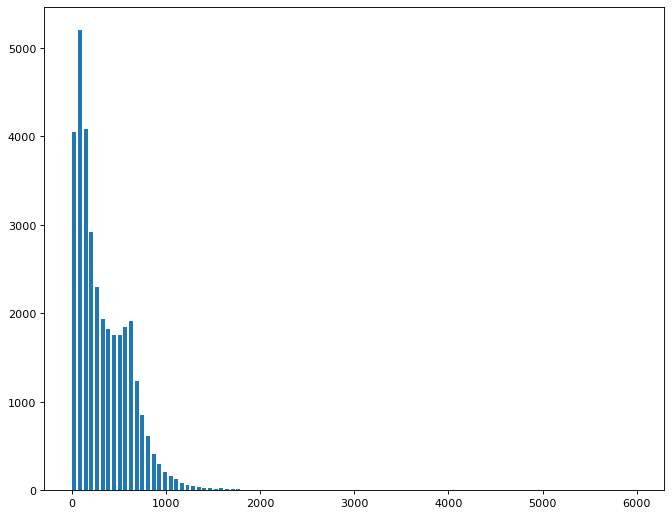

In [30]:
# plot distribution of plot word length
figure(figsize=(10, 8), dpi=80)
plt.hist(plot_len_dfmerg['Plot_Words_Len'], range=(0,6000), rwidth=.7, bins=100)
plt.show()

In [31]:
plot_len_df.describe()

,Plot_Words_Len
count,33868.000000
mean,338.011663
std,287.987068
min,1.000000
25%,110.000000
50%,257.000000
75%,525.000000
max,6177.000000


In [32]:
movie_df_len = pd.merge(plot_len_df, movie_df, left_index=True, right_index=True)
movie_df_len.sort_values(['Plot_Words_Len'])

,Plot_Words_Len,index,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Genre_improved,Genre_grouped,plt_direc_flg,cast_direc_flg,genre_flg,Genre_19_v1,Default_fixed,Genre_Simple
4078,1,7561,1962,Heaven and Earth Magic,American,Harry Everett Smith,NaN,animated,https://en.wikipedia.org/wiki/Heaven_and_Earth...,explains:,animation,animation,1.0,NaN,1.0,animation,NaN,animation
28806,3,7385,1960,Walk Like a Dragon,American,James Clavell,"Jack Lord, Nobu McCarthy, Mel Torme",drama,https://en.wikipedia.org/wiki/Walk_Like_a_Dragon,Film's introduction:,drama,drama,1.0,1.0,1.0,drama,NaN,drama
22893,3,32417,2002,A Saloon Wet with Beautiful Women,Japanese,Tatsurō Kashihara,Koharu Yamasaki,pink,https://en.wikipedia.org/wiki/A_Saloon_Wet_wit...,An erotic romance.,pink,Default,1.0,1.0,1.0,Default,adult,adult
25337,4,28381,1951,Sudharshan,Tamil,Sundar Rao Nadkarni / A. S. A. Sami,"P. U. Chinnappa, P. Kannamba, (Yogam) Mangalam...",unknown,https://en.wikipedia.org/wiki/Sudharshan,Refer this for details.,,Default,1.0,1.0,NaN,Default,unknown,unknown
12137,4,2737,1940,Boss of Bullion City,American,Ray Taylor,"Johnny Mack Brown, Maria Montez, Nell O'Day",western,https://en.wikipedia.org/wiki/Boss_of_Bullion_...,exposes a corrupt sheriff.,action,action,1.0,1.0,1.0,action,NaN,action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,4465,33591,2013,The Flu,South_Korean,Kim Sung-su,"Soo Ae, Jang Hyuk",unknown,https://en.wikipedia.org/wiki/The_Flu_(film),The opening scene shows a group of illegal imm...,,Default,1.0,1.0,NaN,Default,unknown,unknown
19134,4586,15845,2010,Stone,American,John Curran,"Robert De Niro, Edward Norton, Milla Jovovich",thriller,https://en.wikipedia.org/wiki/Stone_(2010_film),Young mother puts her daughter to bed while he...,thriller,thriller,1.0,1.0,1.0,thriller,NaN,thriller
17362,4739,33072,2002,Brigada,Russian,Aleksei Sidorov,"Sergey Bezrukov, Dmitri Dyuzhev, Vladimir Vdov...",crime,https://en.wikipedia.org/wiki/Brigada,"The film proceeds in chronological order, apar...",mystery,mystery,1.0,1.0,1.0,mystery,NaN,mystery
1731,4974,25881,2007,1971,Bollywood,Amrit Sagar,"Manoj Bajpai, Ravi Kishan",war,https://en.wikipedia.org/wiki/1971_(2007_film),"The story takes place in Pakistan in 1977, six...",action,action,1.0,1.0,1.0,action,NaN,action


In [33]:
movie_df_long=movie_df_len[movie_df_len['Plot_Words_Len']>=15]

In [34]:
print(len(movie_df))
print(len(movie_df_long))

33868
33520


In [35]:
# replace the main dataframe with the version only including plots over 15 words
movie_df=movie_df_long

### 9. Visualize Distribution of Genre

In [36]:
len(movie_df['Genre'].value_counts())

2190

In [37]:
len(movie_df)

33520

In [38]:
genre_list=movie_df['Genre_Simple'].value_counts()
genre_list=pd.DataFrame(genre_list)
genre_list=genre_list.reset_index()
genre_list

,index,Genre_Simple
0,drama,6367
1,unknown,5853
2,comedy,5093
3,action,4002
4,thriller,2949
5,mystery,2012
6,romance,1515
7,animation,791
8,comedy|romance,778
9,comedy|drama,640


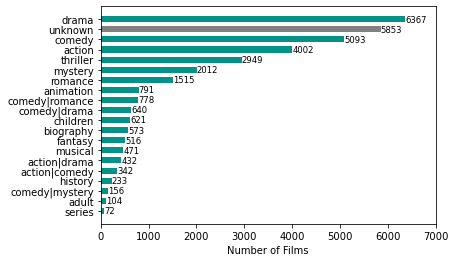

In [39]:
fig, ax = plt.subplots()
plt.rcdefaults()
matplotlib.rcParams.update({'font.size': 8.5})
y_pos = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
ax.set_yticks(y_pos, labels=genre_list['index'])
ax.invert_yaxis()
bars = ax.barh(genre_list['index'], genre_list['Genre_Simple'], height=.6, color=[mcd.XKCD_COLORS["xkcd:teal"],'grey',mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"]])
ax.bar_label(bars)
ax.set_xlabel('Number of Films')
plt.xlim(0, 7000)
plt.show()

### 10. Visualize Distribution of Years

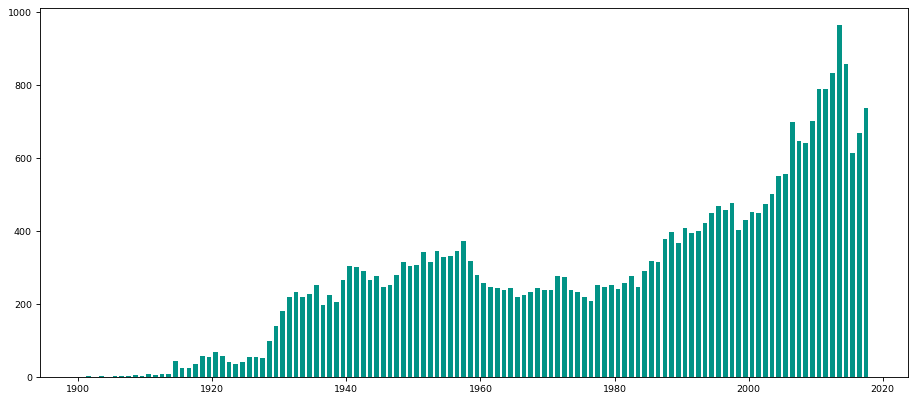

In [40]:
figure(figsize=(14, 6), dpi=80)
plt.hist(movie_df['Release Year'],range=(1900,2018), rwidth=.7, bins=118,color=mcd.XKCD_COLORS["xkcd:teal"])
plt.show()

### 11. Visualize Distribution of Film Region

In [41]:
movie_df['REGION']=np.where(movie_df['Origin/Ethnicity']=='South_Korean', 'South Korean', movie_df['Origin/Ethnicity'])
movie_df['REGION'].value_counts(normalize=True)

/var/folders/26/fmmjwwb14xv0qs1bkkgbnj5h0000gp/T/ipykernel_24407/552544730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['REGION']=np.where(movie_df['Origin/Ethnicity']=='South_Korean', 'South Korean', movie_df['Origin/Ethnicity'])


American        0.512142
British         0.100865
Bollywood       0.083264
Tamil           0.072673
Telugu          0.034189
Japanese        0.032399
Malayalam       0.030728
Hong Kong       0.022017
Canadian        0.020406
Australian      0.016110
South Korean    0.015155
Chinese         0.013365
Kannada         0.012112
Bengali         0.008681
Russian         0.006802
Marathi         0.004117
Filipino        0.003669
Bangladeshi     0.002476
Punjabi         0.002446
Malaysian       0.002029
Turkish         0.002029
Egyptian        0.001999
Assamese        0.000268
Maldivian       0.000060
Name: REGION, dtype: float64

In [42]:
region_list=movie_df['REGION'].value_counts()
region_list=pd.DataFrame(region_list)
region_list=region_list.reset_index()

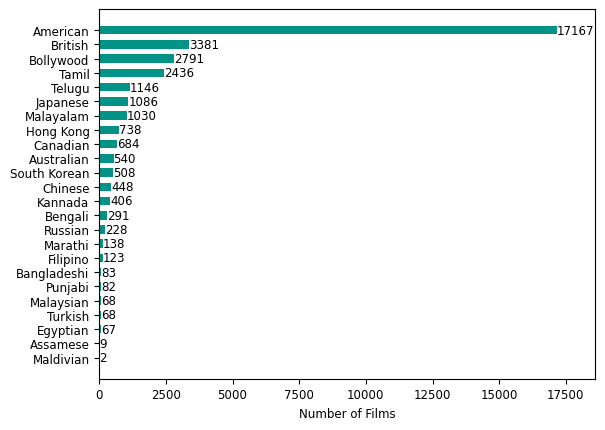

In [43]:
fig, ax = plt.subplots()
plt.rcdefaults()
matplotlib.rcParams.update({'font.size': 8.5})
y_pos = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
ax.set_yticks(y_pos, labels=region_list['index'])
ax.invert_yaxis()
bars = ax.barh(region_list['index'], region_list['REGION'], height=.6, color=[mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"],mcd.XKCD_COLORS["xkcd:teal"]])
ax.bar_label(bars)
ax.set_xlabel('Number of Films')
plt.xlim(0, 18600)
plt.show()

### 12. Save Cleaned Data

In [44]:
movie_df.to_csv('movie_df_final.csv')